In [14]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def plot_attention_map(attention_map, tokens, ax):
    """
    Plots a heatmap for the attention map.

    :param attention_map: A 2D numpy array or PyTorch tensor of shape (seq_len, seq_len),
                          representing the attention scores from each word to every other word.
    :param tokens: A list of tokens corresponding to the sequence elements.
    """
    # Convert to numpy if it's a tensor
    if not isinstance(attention_map, np.ndarray):
        attention_map = attention_map.cpu().detach().numpy()
    
    sns.heatmap(attention_map, annot=False, fmt=".2f", cmap='coolwarm', cbar=False,
                # xticklabels=tokens, 
                # yticklabels=tokens,
                ax=ax
               )
    # plt.xlabel('Key')
    # plt.ylabel('Query')
    # plt.title('Attention Map')
    # plt.show()

In [2]:
def get_first_n_words(text, n):
    words = text.split()
    first_n_words = words[:n]
    return ' '.join(first_n_words)
    
full_prompt = """In the dim glow of the setting sun, two figures sat on the edge of a weathered dock, legs dangling over the water's serene surface. The ripples below mirrored the tumultuous thoughts swirling in their minds. One broke the silence, their voice barely above a whisper, "Do you ever wonder about our existence? Why we're here, in this vast, unfathomable universe?"
# The other turned, their eyes reflecting the dying light, "All the time. It feels like we're just specks in an infinite cosmos, doesn't it? But maybe that's what makes our lives so precious. The rarity of consciousness in this vastness."
# The first nodded, "It's daunting, though. Our time is so fleeting, and yet, we spend it in pursuit of things that often don't seem to matter in the grand scale of the universe."
# "There's beauty in that pursuit, though," the second countered gently. "Perhaps the meaning isn't in the grandeur or the scale, but in the moments, the connections we forge, the love we share. Maybe our existence is defined not by the why but by the how. How we choose to live, how we impact others."
# As the sun dipped below the horizon, a comfortable silence settled between them, each lost in contemplation. The vastness of the universe, with all its mysteries and wonders, seemed a little less daunting as they sat together, ancxihored in the shared understanding that while they may not have all the answers, they had each other, and maybe, for now, that was enough."""

length = 16
prompt = get_first_n_words(full_prompt, length)

attn00.pkl


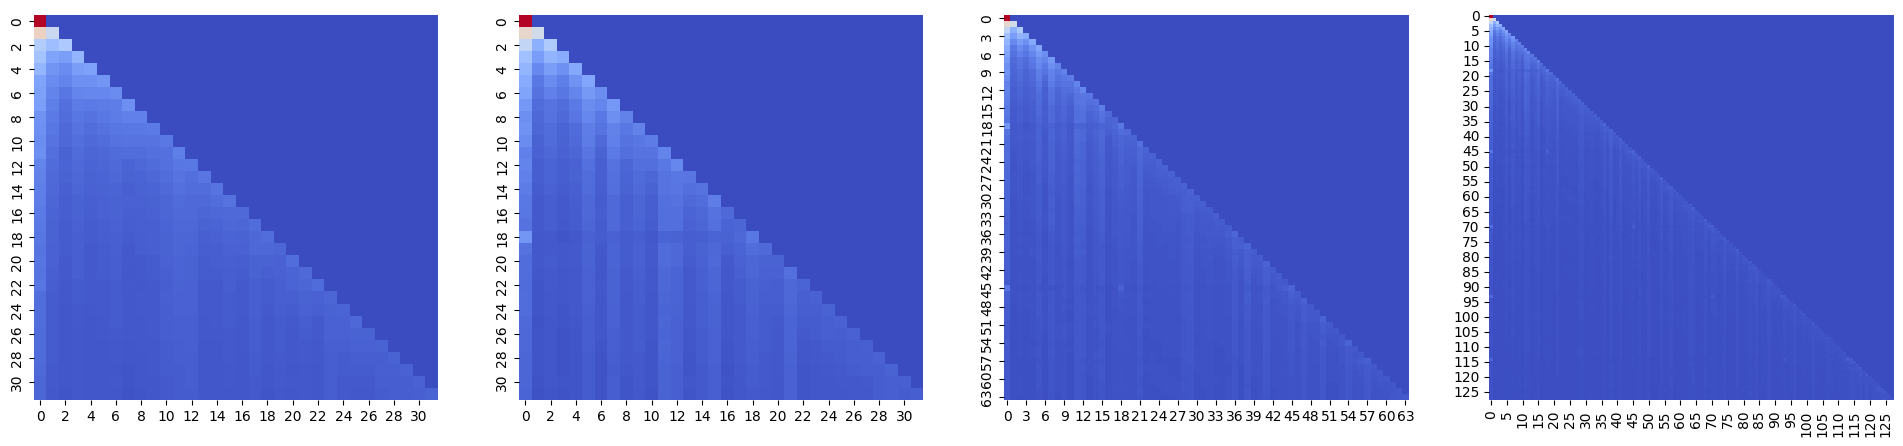

attn01.pkl


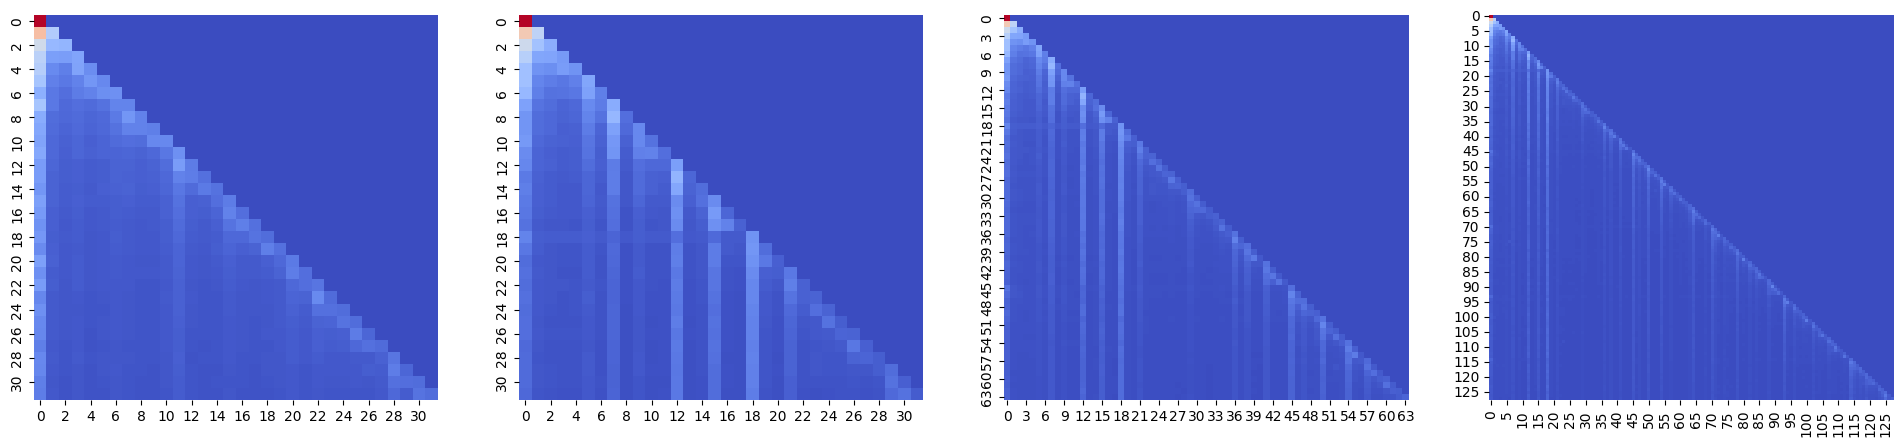

attn02.pkl


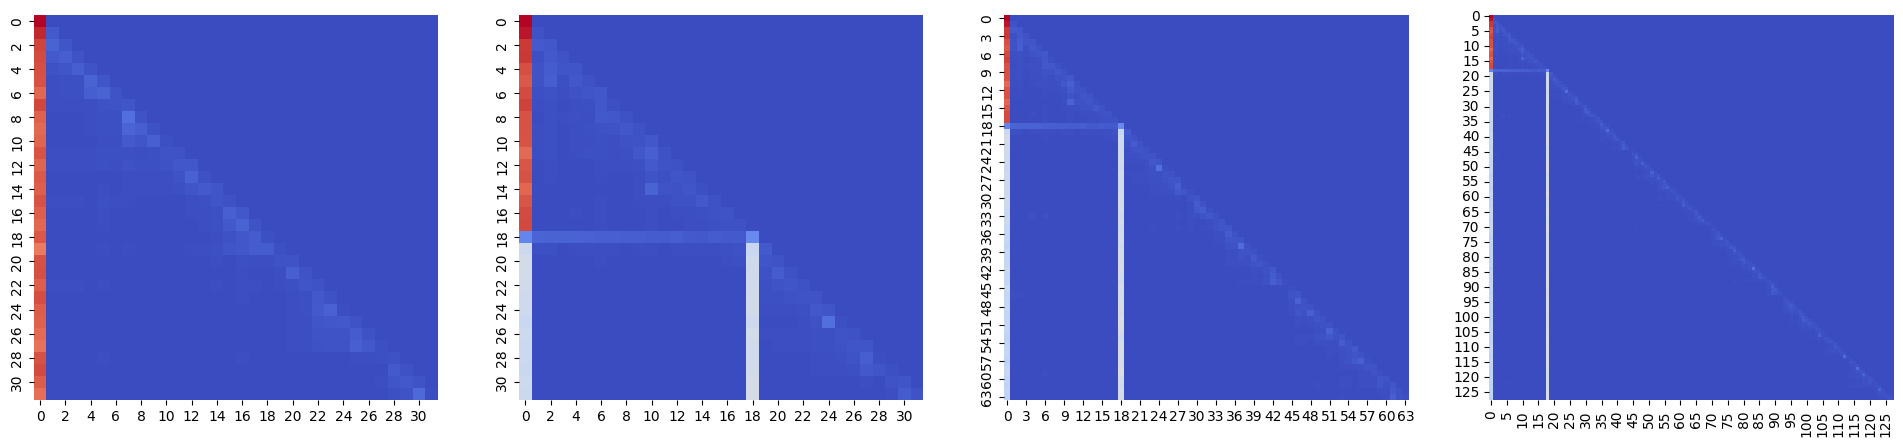

attn03.pkl


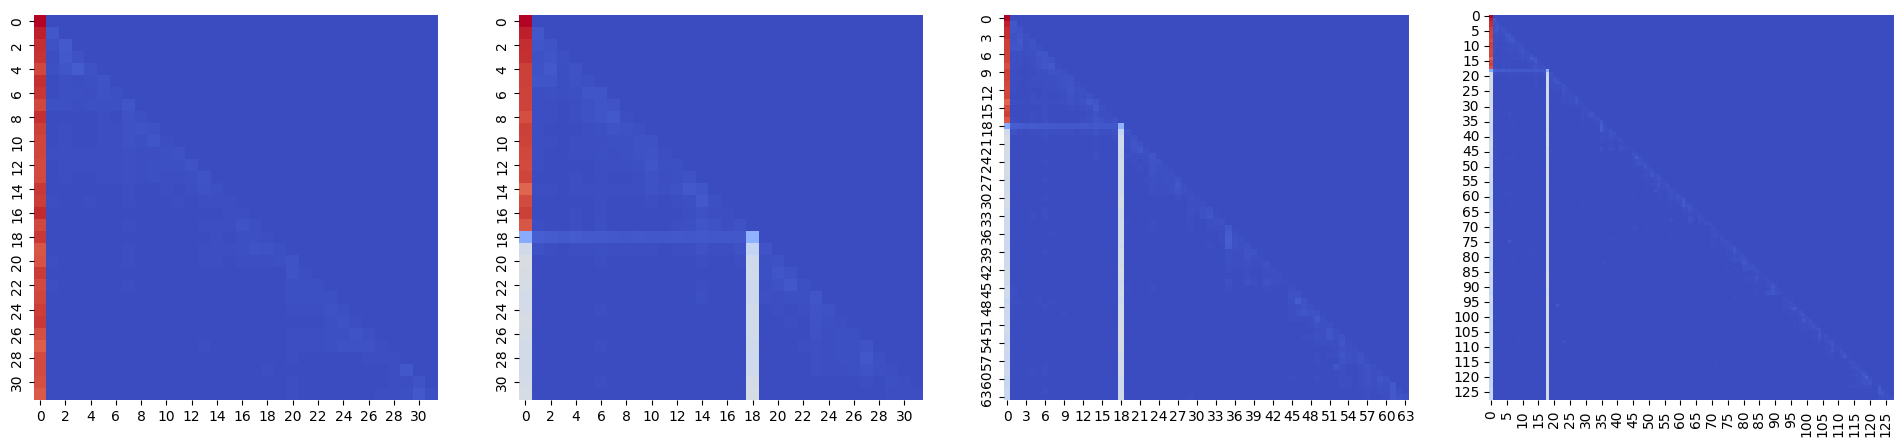

attn04.pkl


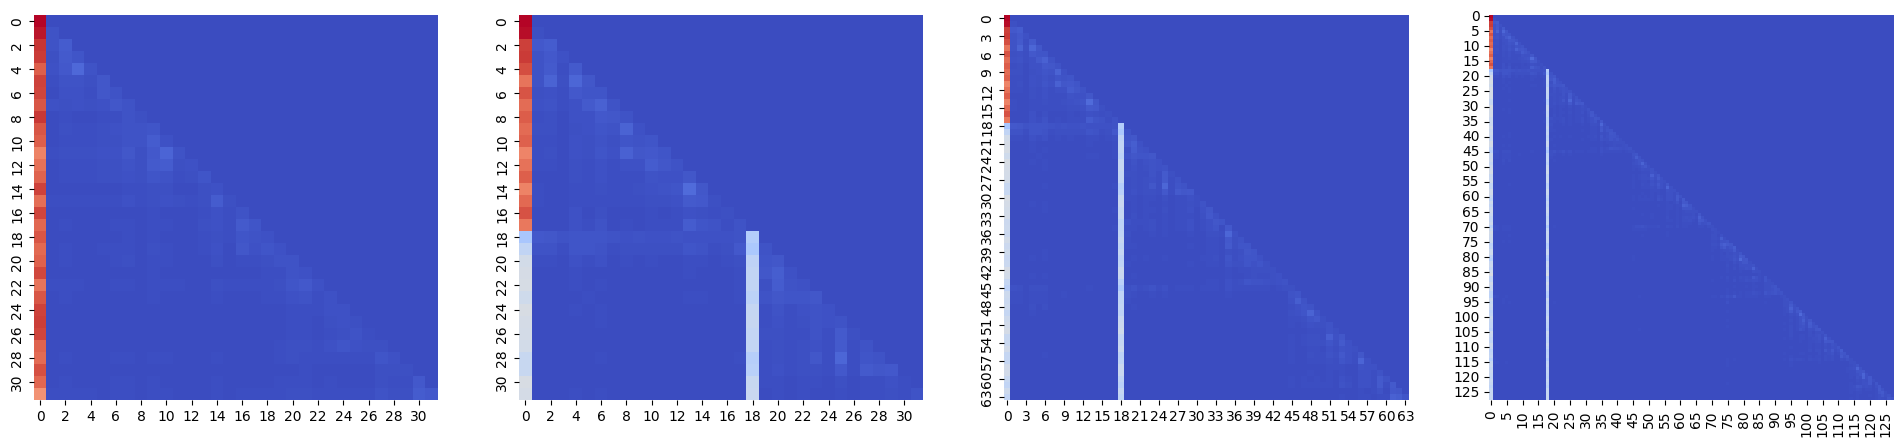

attn05.pkl


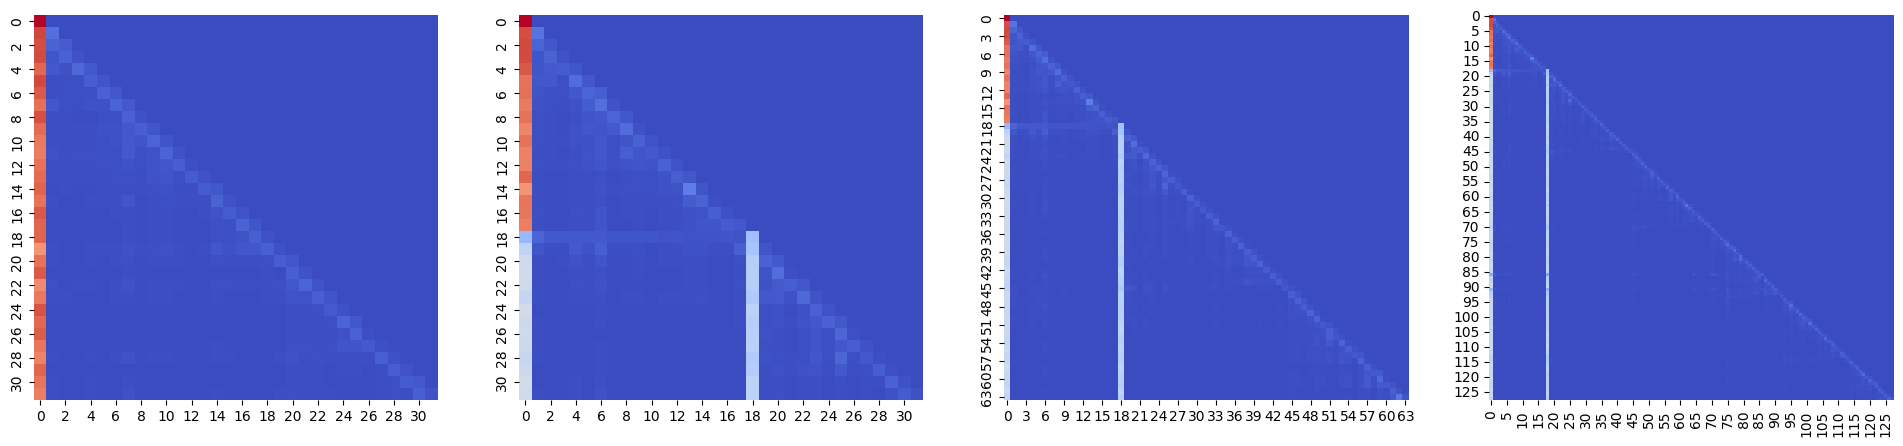

attn06.pkl


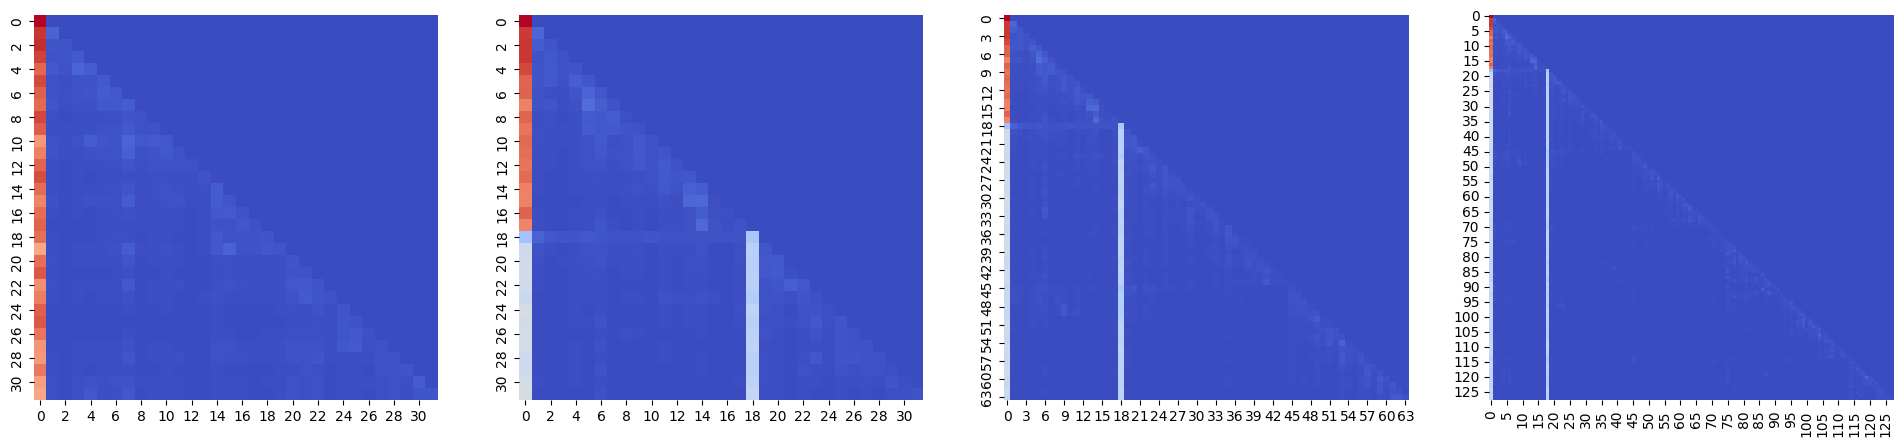

attn07.pkl


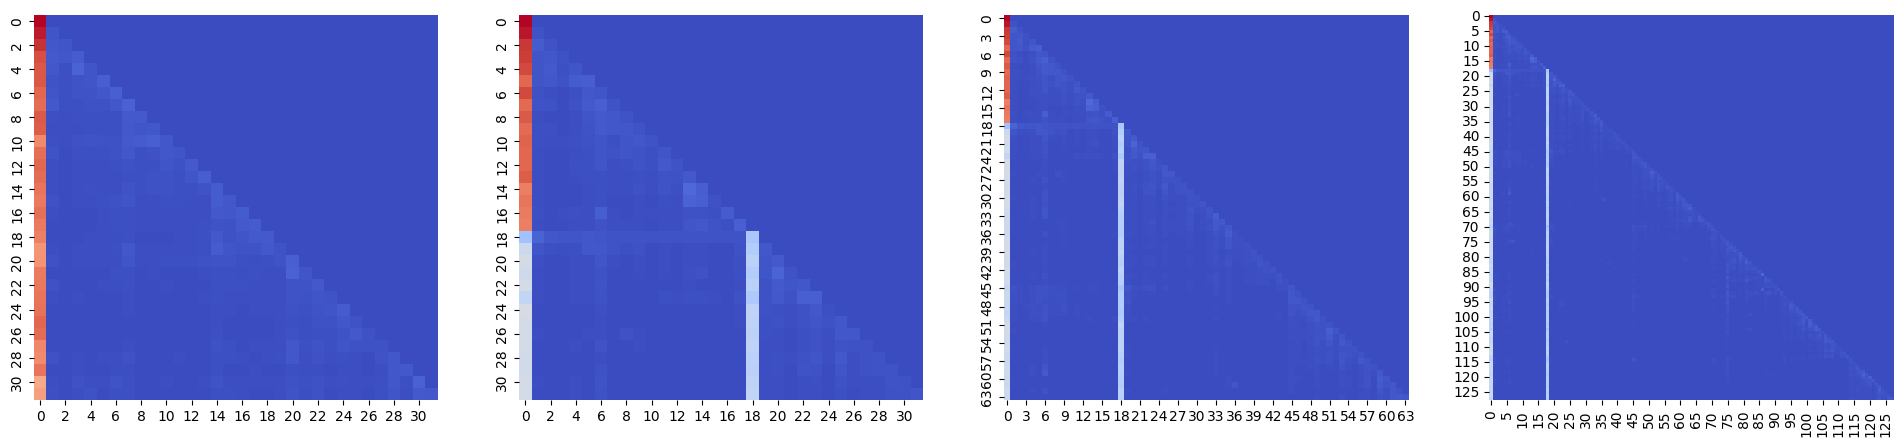

attn08.pkl


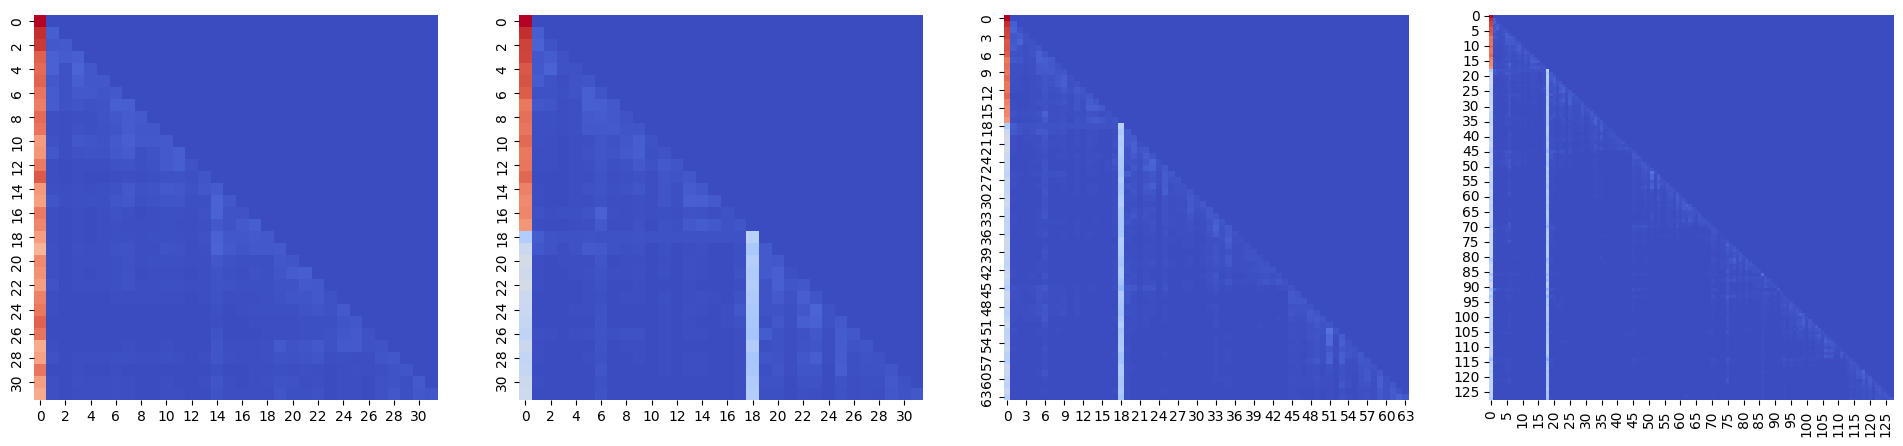

attn09.pkl


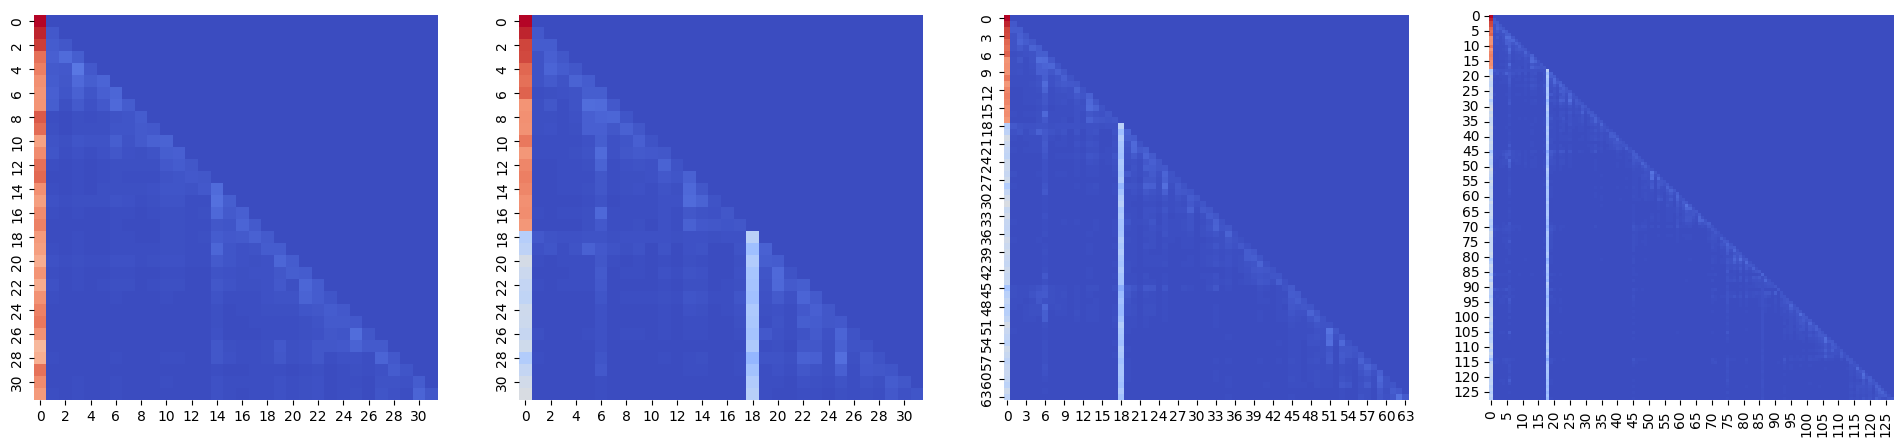

attn10.pkl


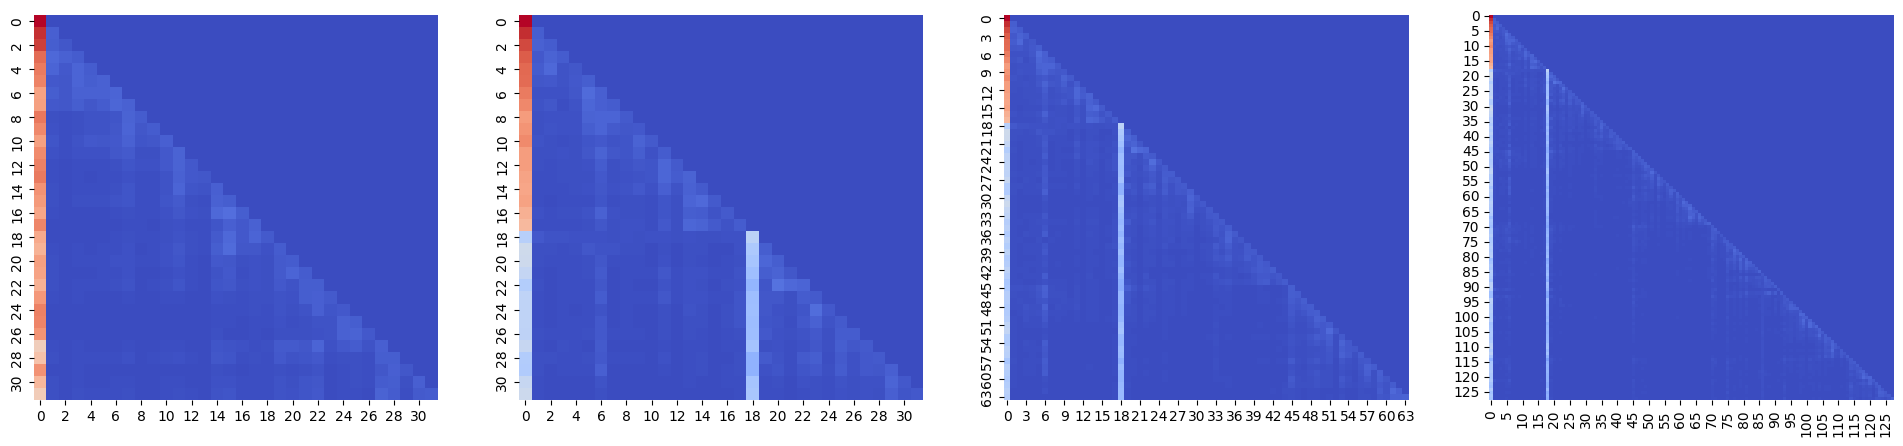

attn11.pkl


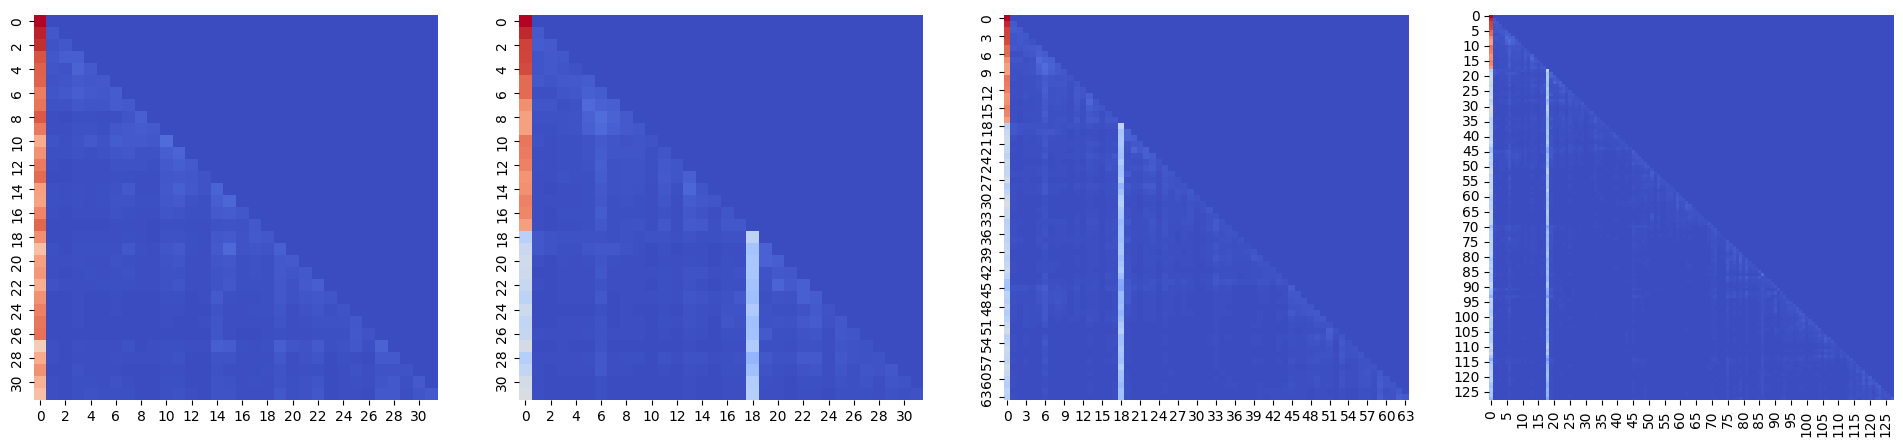

attn12.pkl


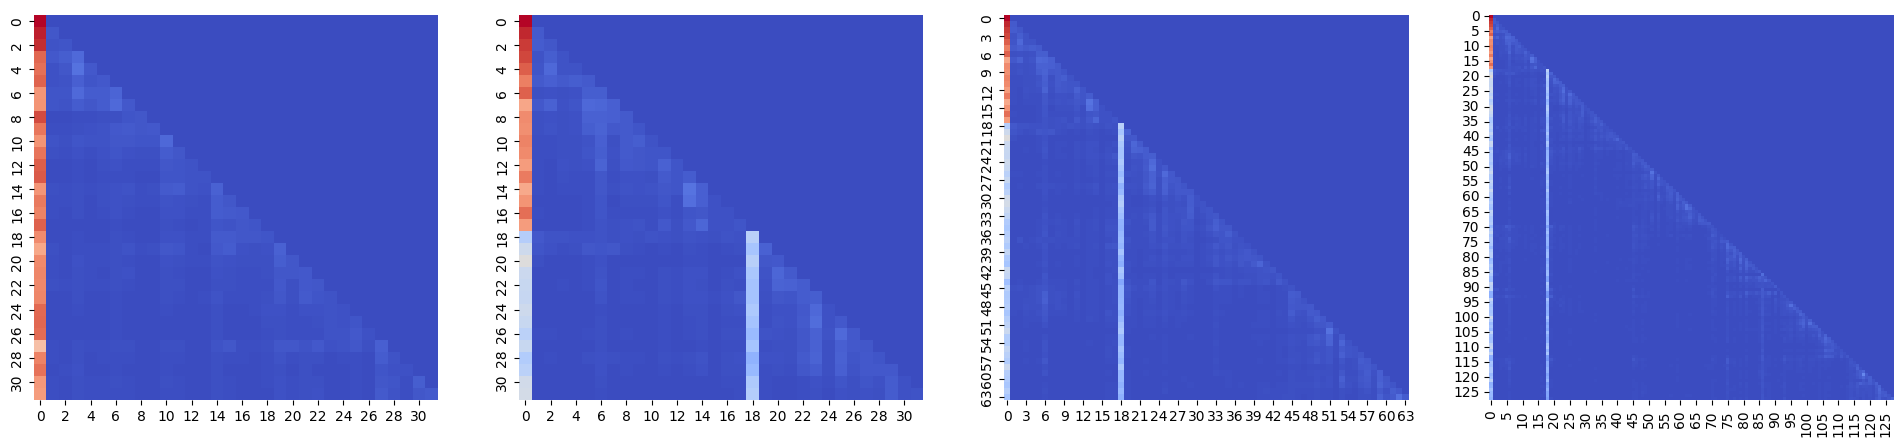

attn13.pkl


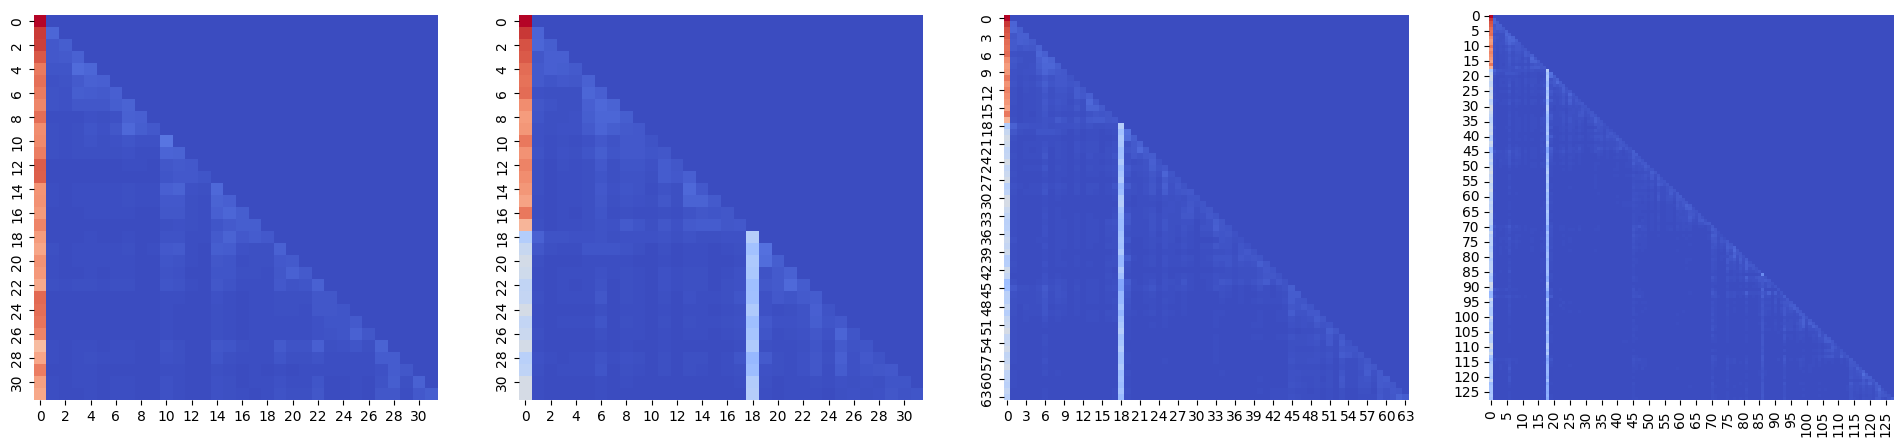

attn14.pkl


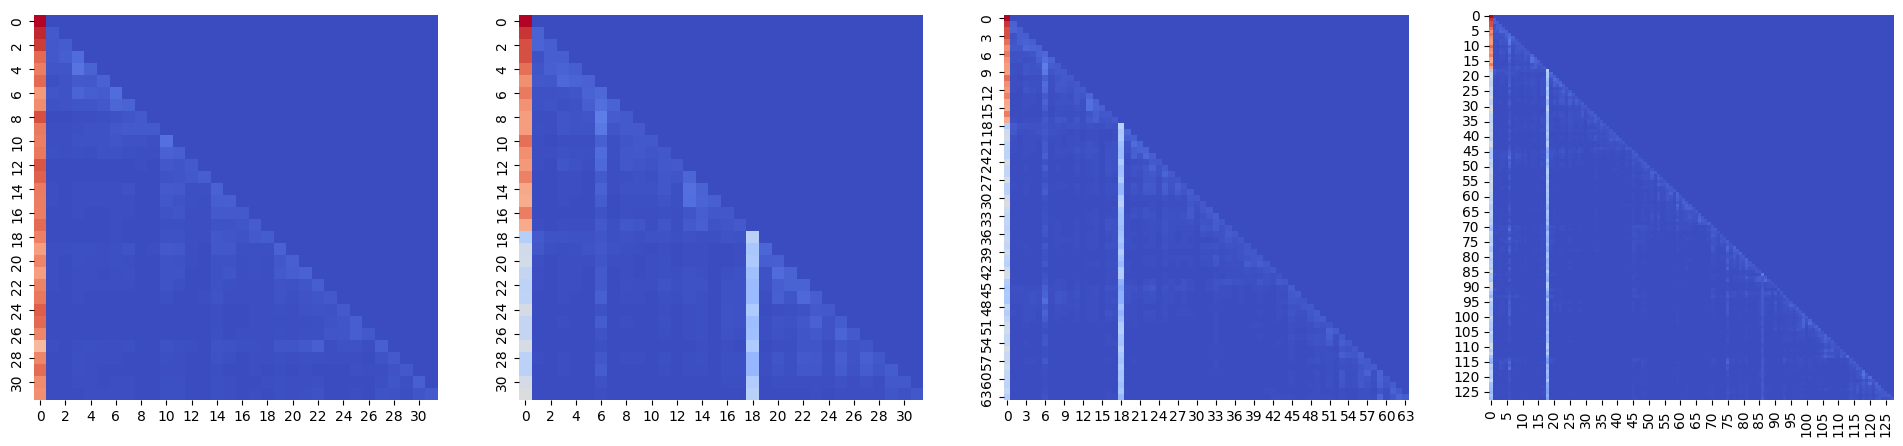

attn15.pkl


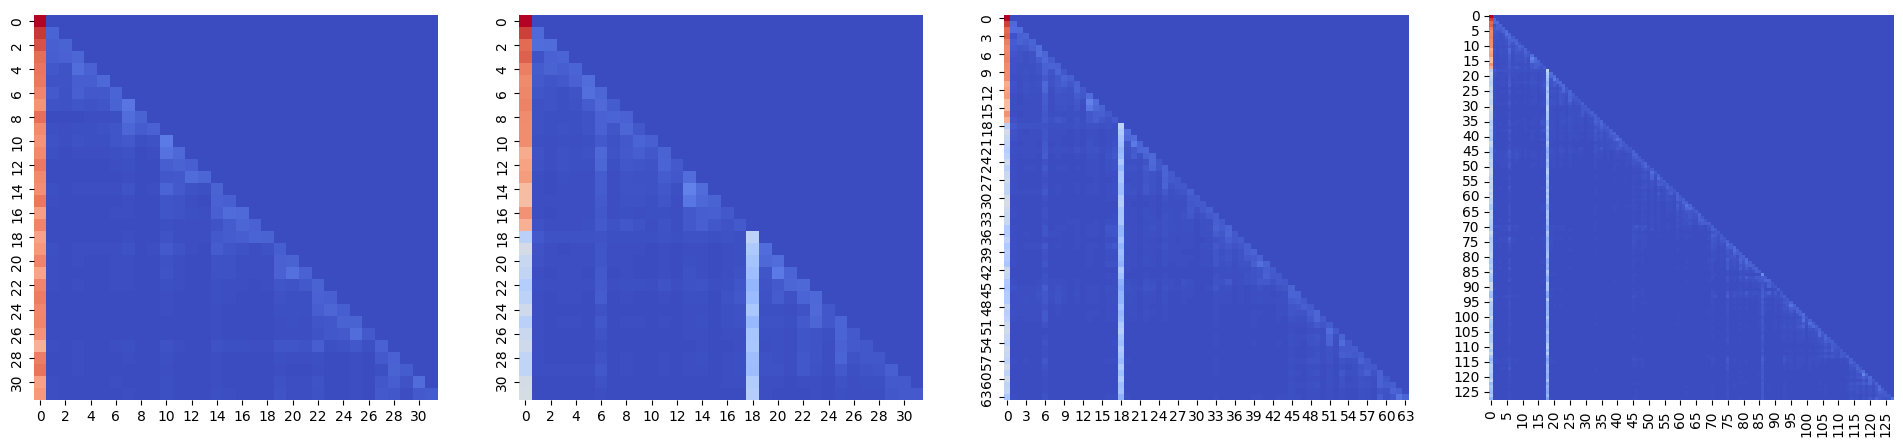

attn16.pkl


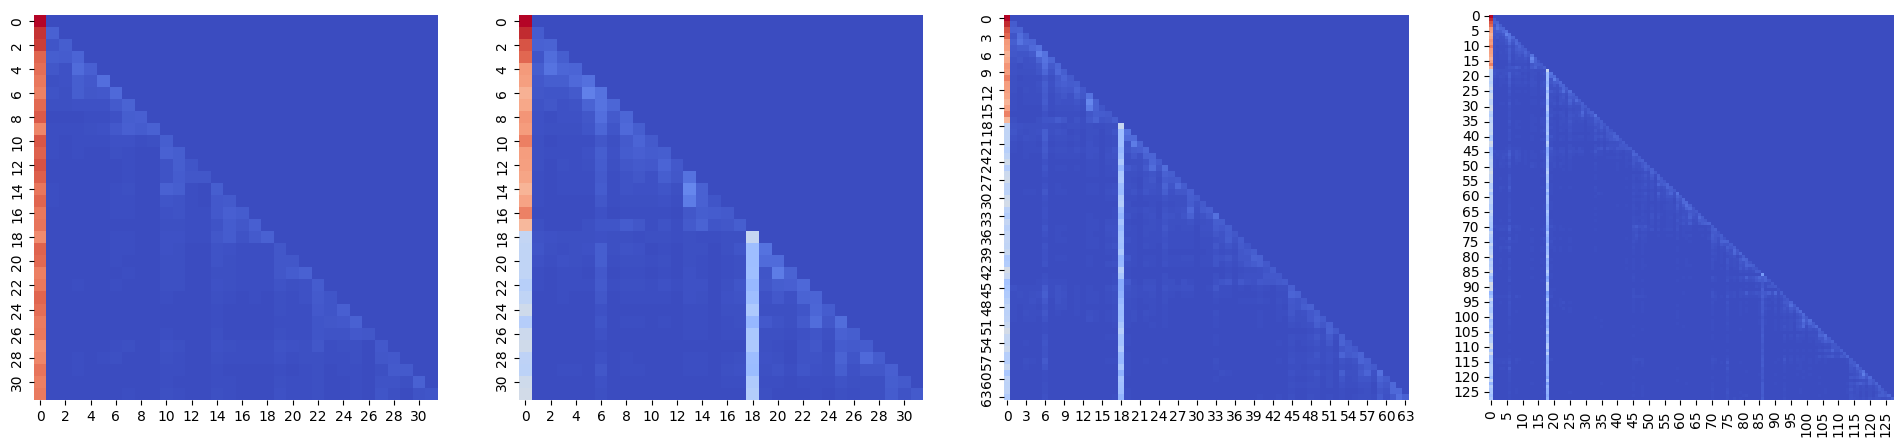

attn17.pkl


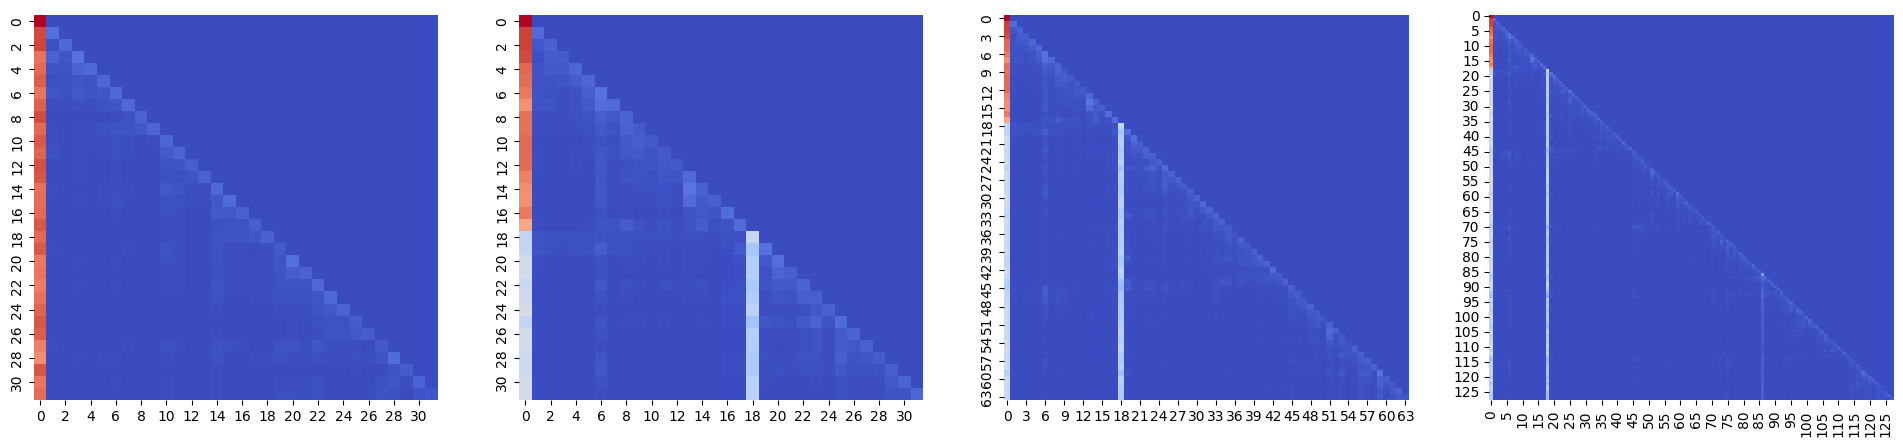

attn18.pkl


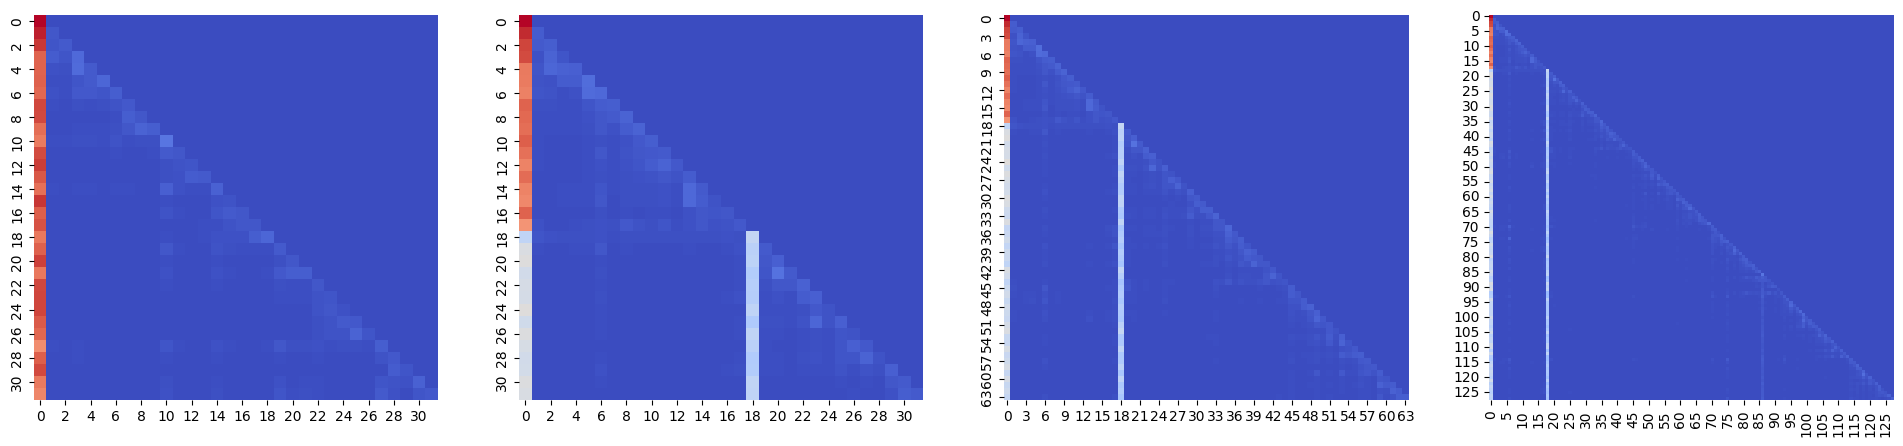

attn19.pkl


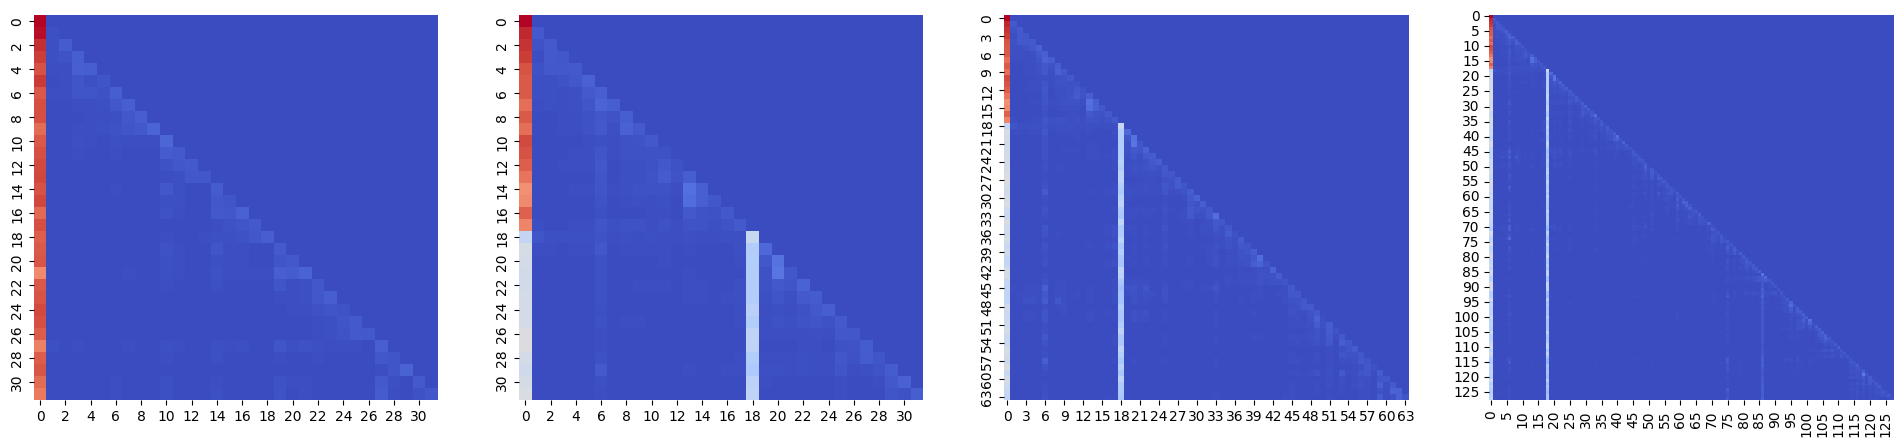

attn20.pkl


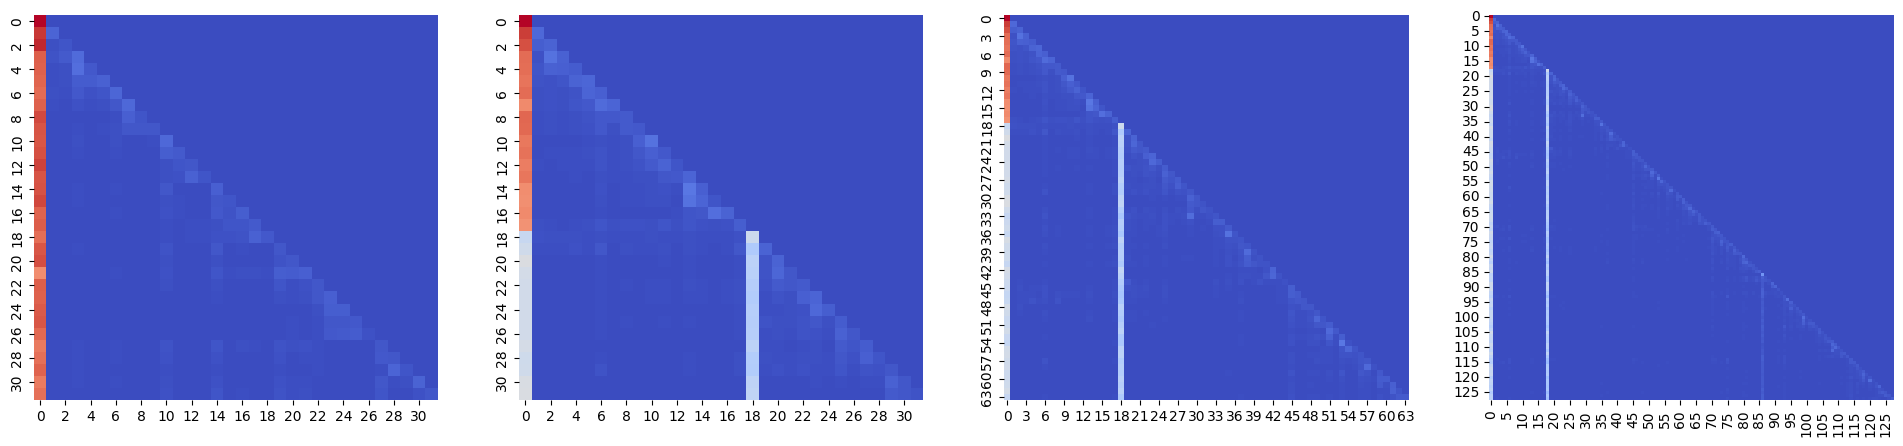

attn21.pkl


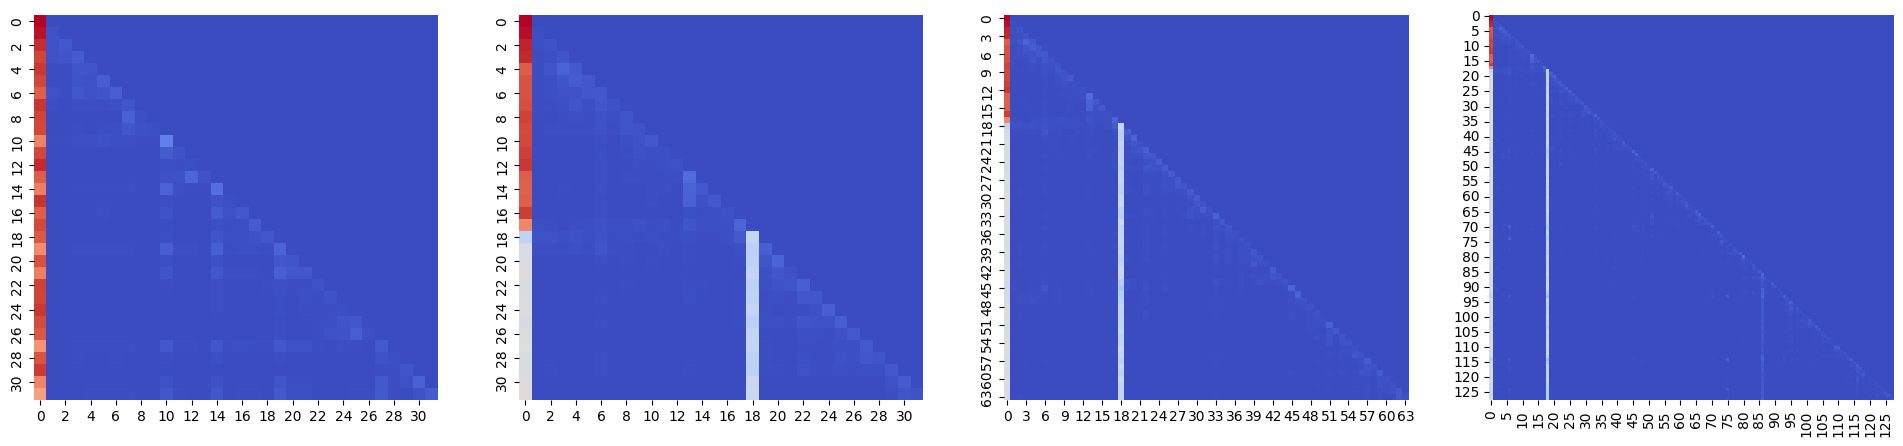

attn22.pkl


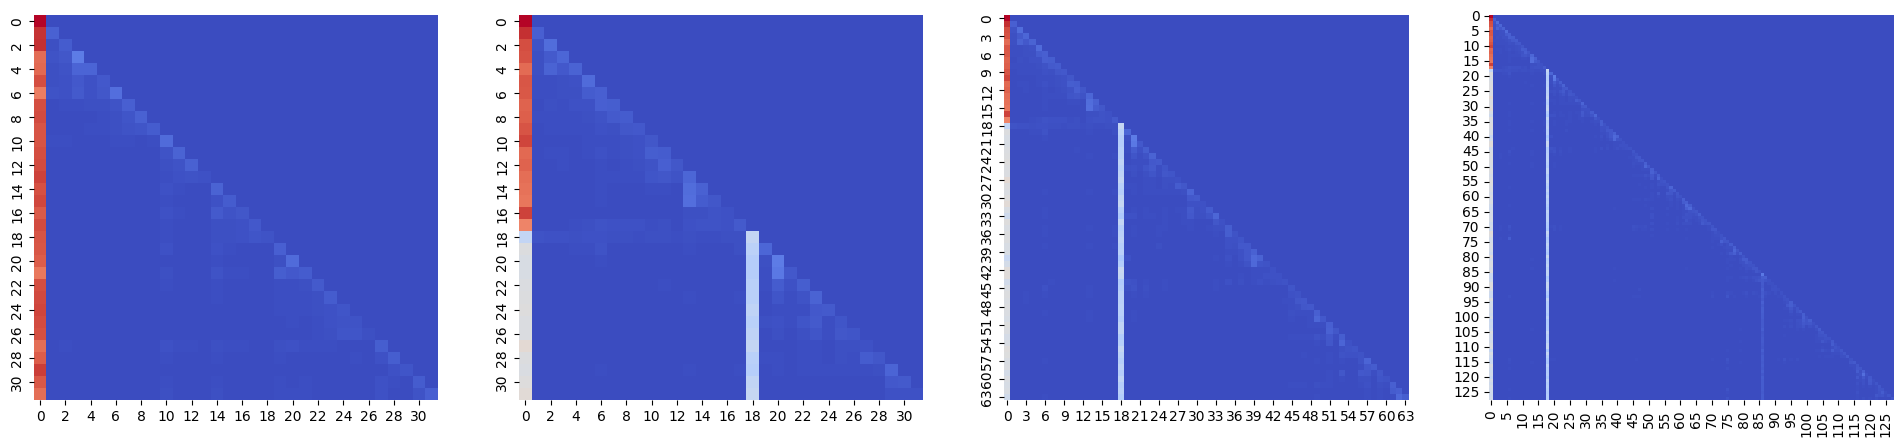

attn23.pkl


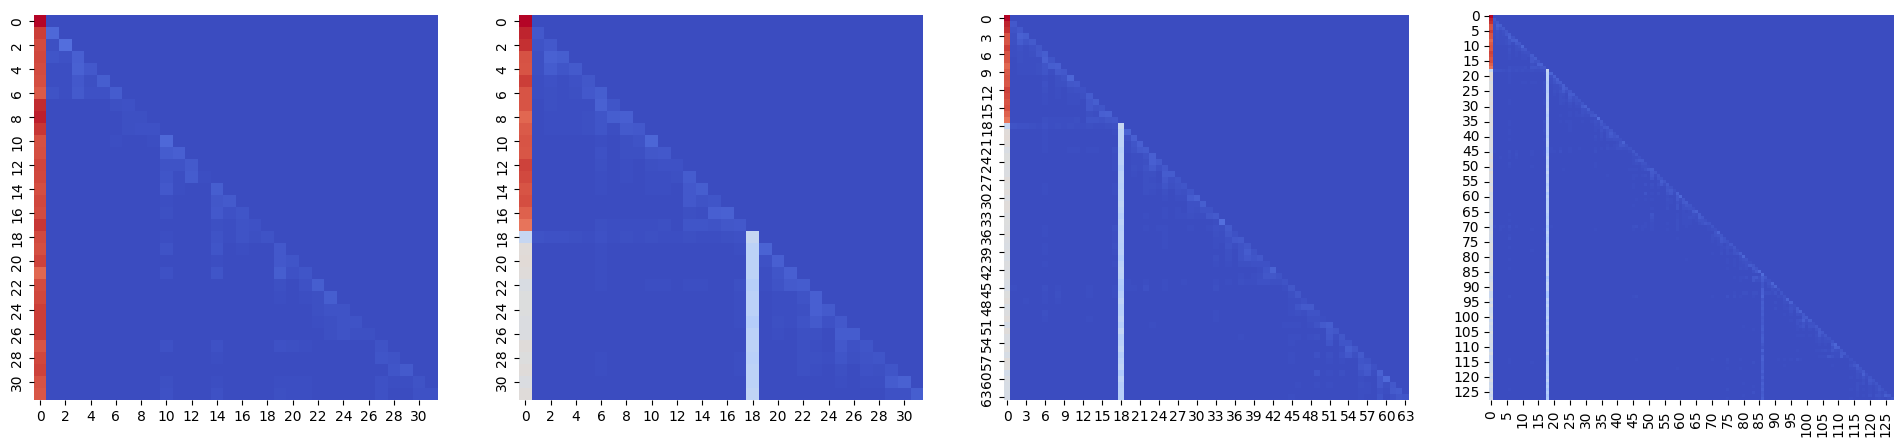

attn24.pkl


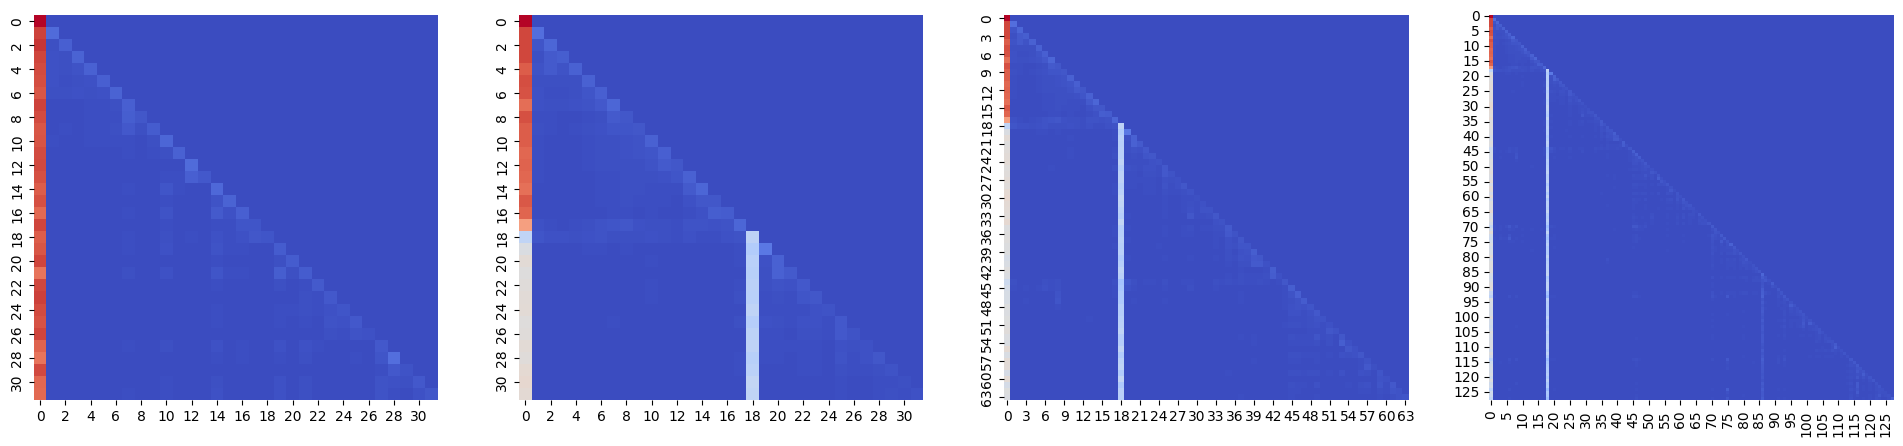

attn25.pkl


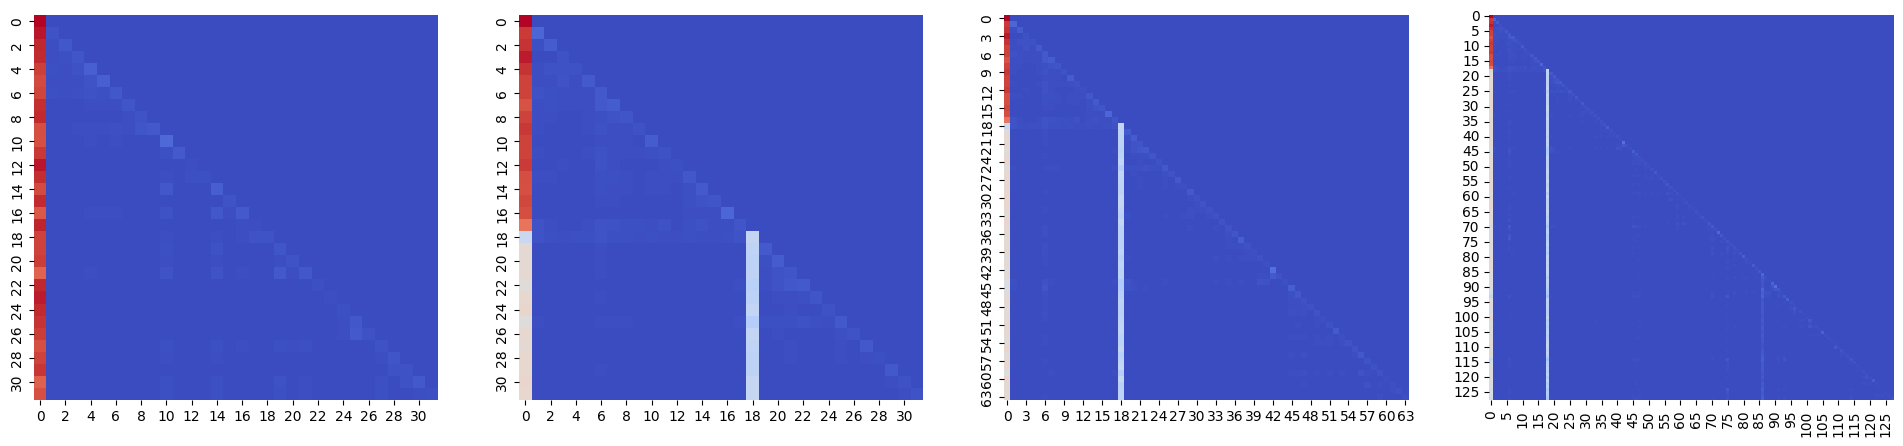

attn26.pkl


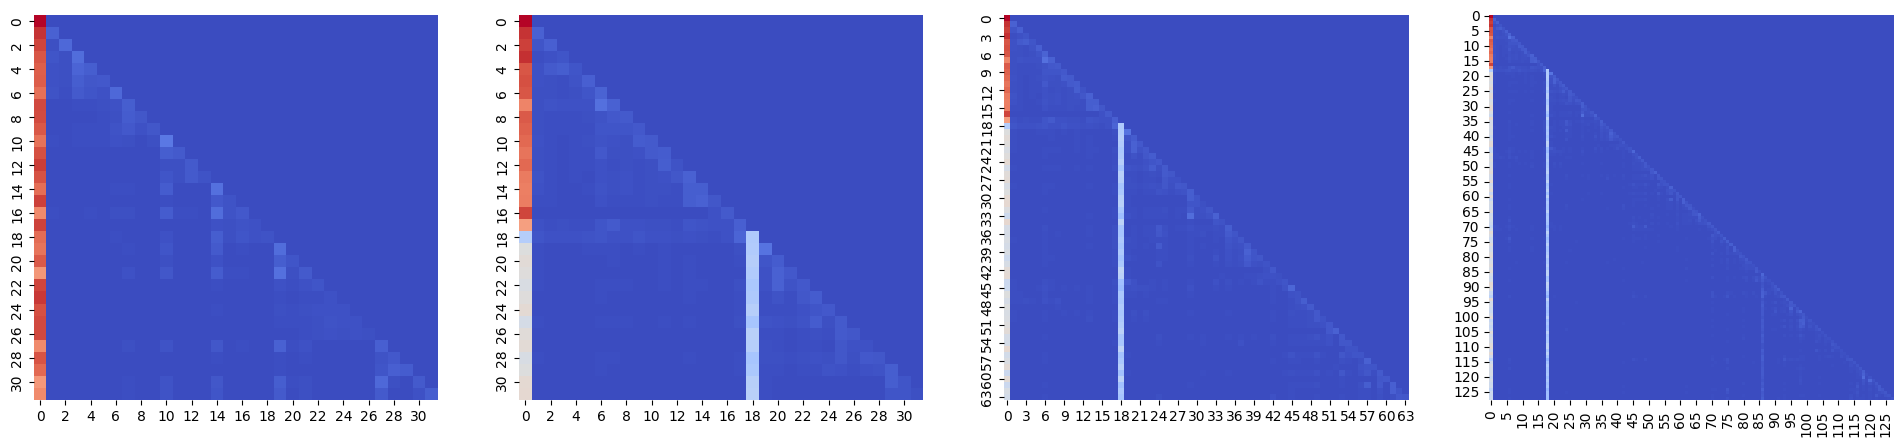

attn27.pkl


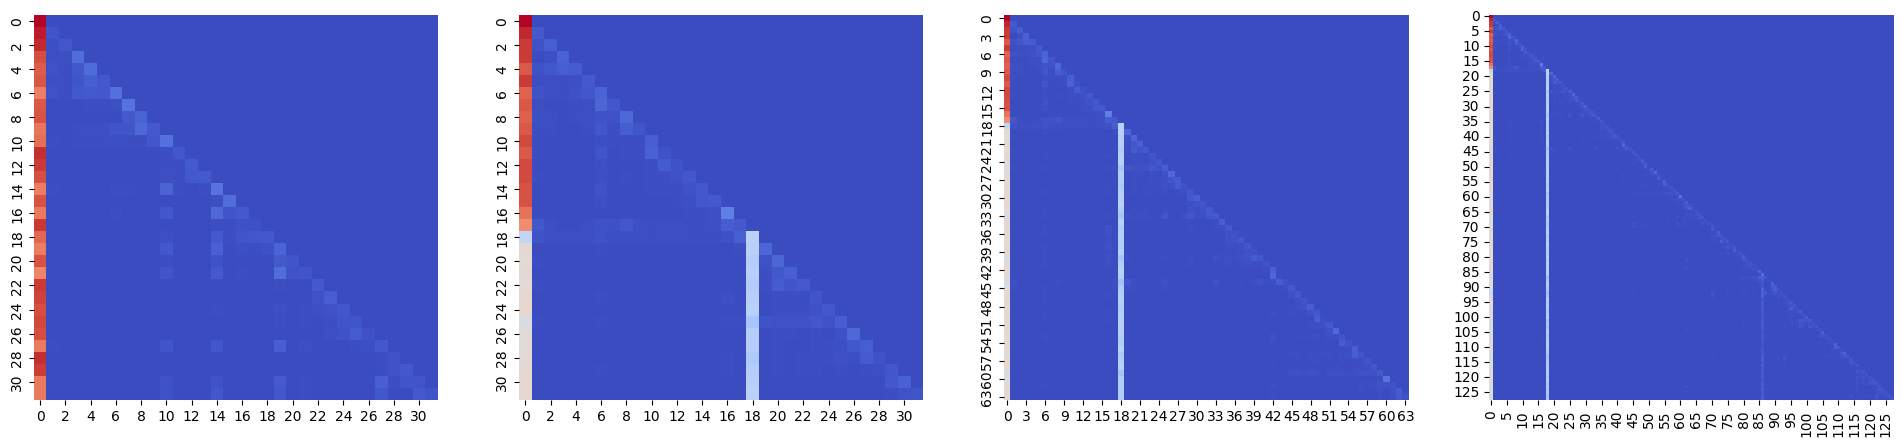

attn28.pkl


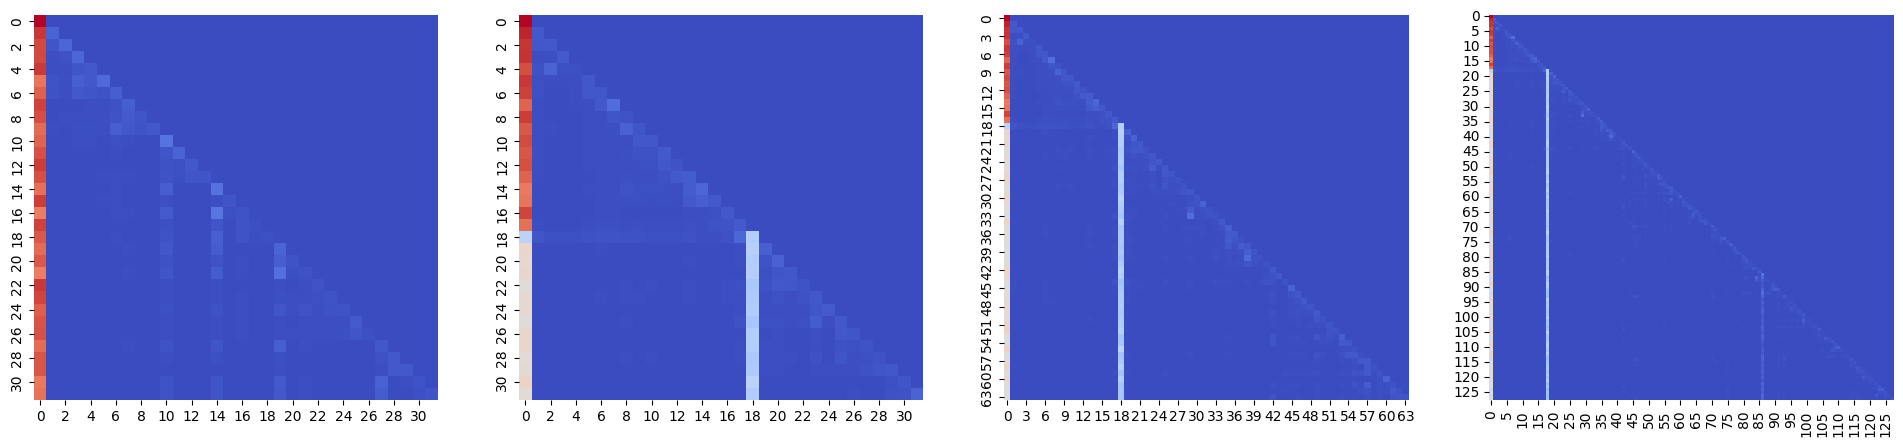

attn29.pkl


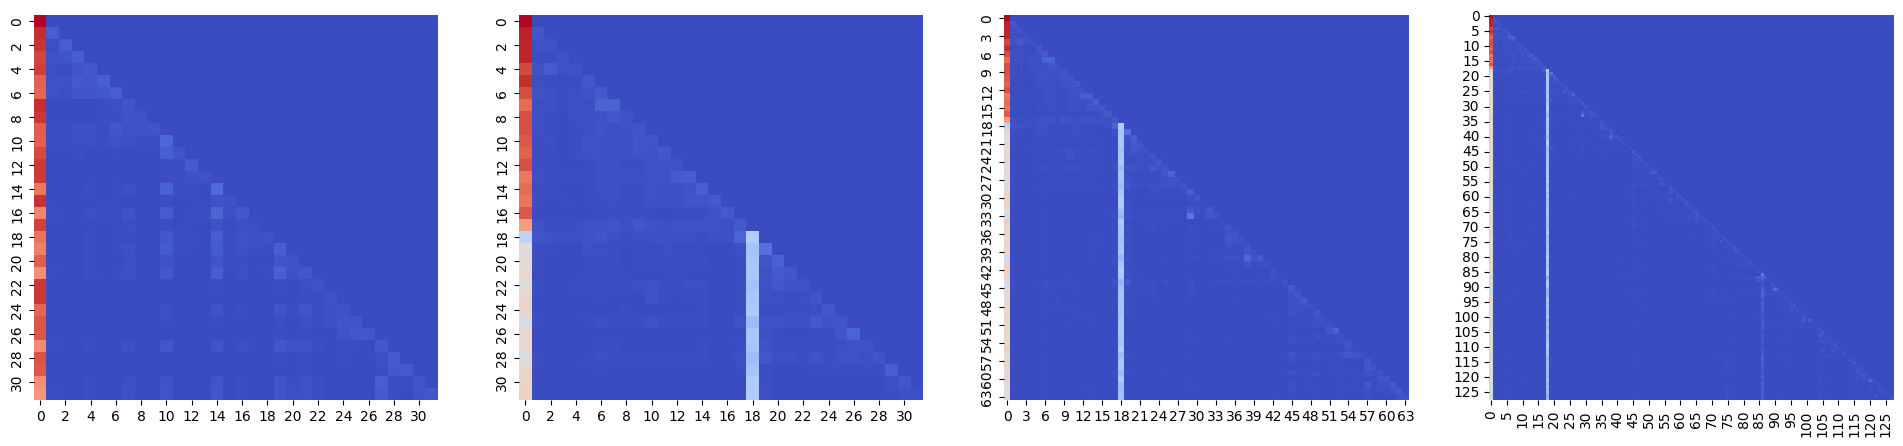

attn30.pkl


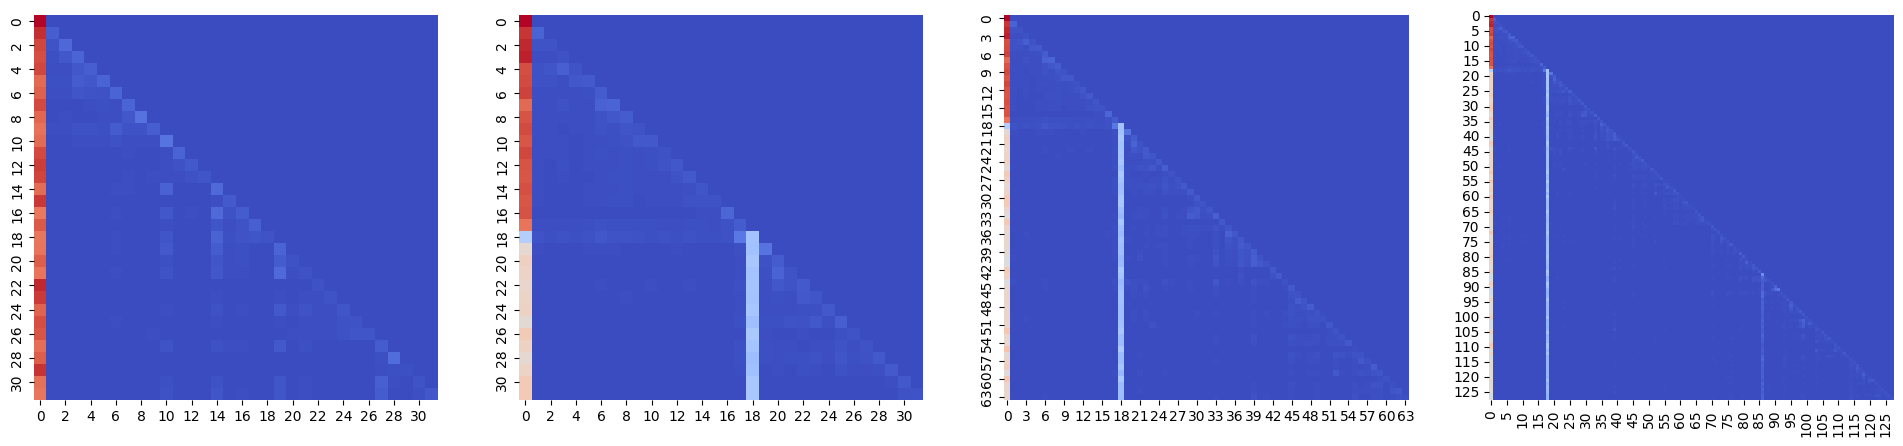

attn31.pkl


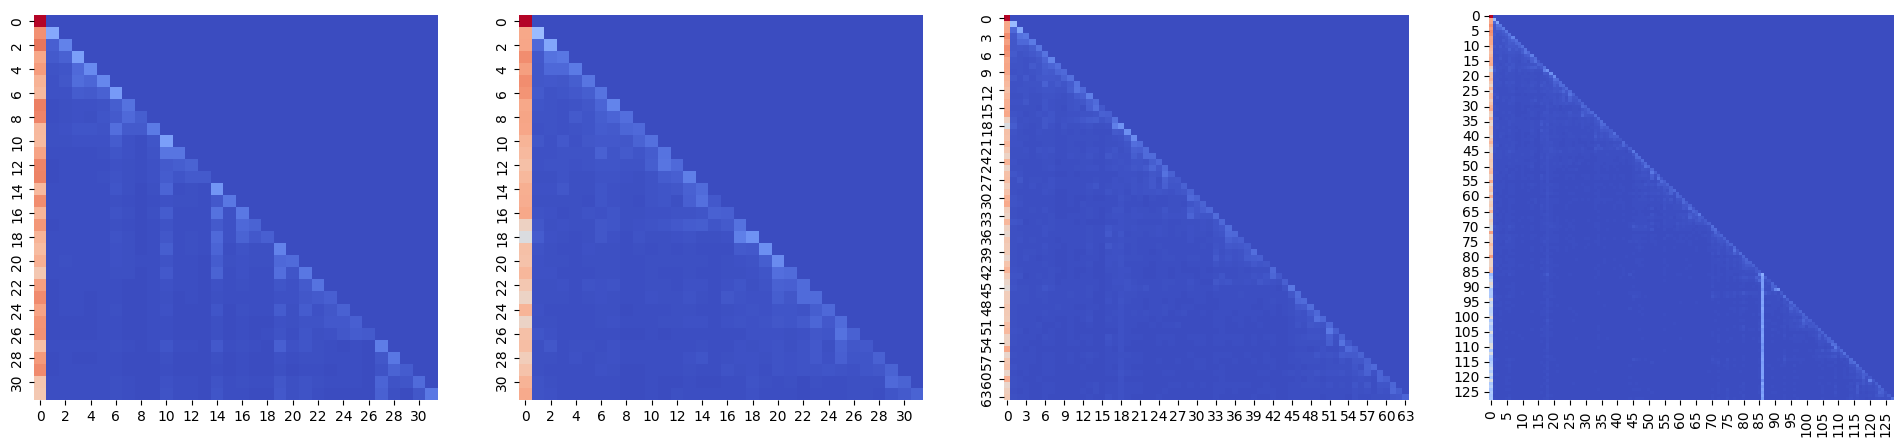

In [23]:
folders = ["prompt_random_32", "prompt_32", "prompt_64", "prompt_128"]

files = sorted([f for f in os.listdir(folders[0]) if f.endswith(".pkl")])

for file in files:
    print(file)
    fig, axs = plt.subplots(1, 4, figsize=(24,5))
    for i, folder in enumerate(folders):
        path = os.path.join(folder, file)
        # print(f"path {path}")
        attn_weights = torch.load(path)
        attention_map = attn_weights[0].sum(dim=0)

        # print("attn_weights.shape", attn_weights.shape)
        plot_attention_map(attention_map, prompt.split(), ax=axs[i])
        
    plt.savefig(os.path.join("output_figs", file.split(".")[0]+".pdf"))
    plt.show()
        # break


In [31]:
attn_weights.shape

torch.Size([1, 32, 19, 19])

In [52]:

import os
from time import time

import torch
from transformers import LlamaForCausalLM, LlamaTokenizer, AutoTokenizer

# sns.set_style("darkgrid")

OUTPUT_PATH = "dl_llama2/"

device = "cuda:0" if torch.cuda.is_available() else "cpu"
            



def task1_step2():
    # Task 1 - Step 2
    temperatures = [0.1, 0.9]
    n = 10

    prompt = "Hey, are you conscious? Can you talk to me?"
    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    for t in temperatures:
        print(f"\n\n TEMPERATURE {t}")
        for i in range(n):

            # Generate
            generate_ids = model.generate(inputs.input_ids, max_length=30, do_sample=True, temperature=t)
            output = tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
            print(f"[{i+1}] ", output)

def task1_step3():
    #     # Task 1 - Step 3
    def get_first_n_words(text, n):
        words = text.split()
        first_n_words = words[:n]
        return ' '.join(first_n_words)

    full_prompt = """In the dim glow of the setting sun, two figures sat on the edge of a weathered dock, legs dangling over the water's serene surface. The ripples below mirrored the tumultuous thoughts swirling in their minds. One broke the silence, their voice barely above a whisper, "Do you ever wonder about our existence? Why we're here, in this vast, unfathomable universe?"
# The other turned, their eyes reflecting the dying light, "All the time. It feels like we're just specks in an infinite cosmos, doesn't it? But maybe that's what makes our lives so precious. The rarity of consciousness in this vastness."
# The first nodded, "It's daunting, though. Our time is so fleeting, and yet, we spend it in pursuit of things that often don't seem to matter in the grand scale of the universe."
# "There's beauty in that pursuit, though," the second countered gently. "Perhaps the meaning isn't in the grandeur or the scale, but in the moments, the connections we forge, the love we share. Maybe our existence is defined not by the why but by the how. How we choose to live, how we impact others."
# As the sun dipped below the horizon, a comfortable silence settled between them, each lost in contemplation. The vastness of the universe, with all its mysteries and wonders, seemed a little less daunting as they sat together, ancxihored in the shared understanding that while they may not have all the answers, they had each other, and maybe, for now, that was enough."""

    n_repeat = 10
    prompt_lengths = [16, 64, 128, 256]
    
    results = {}
    t = 0.9

    # Warmp-up
    prompt = "Hey, are you conscious? Can you talk to me?"    
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    for _ in range(10):
        generate_ids = model.generate(inputs.input_ids, max_length=30, do_sample=True, temperature=t)
        output = tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

    # Measure latency
    for length in prompt_lengths:
        curr_length_res = []
        print(f"Generating outputs for length {length}...")
        for _ in range(n_repeat):
            prompt = get_first_n_words(full_prompt, length)
            inputs = tokenizer(prompt, return_tensors="pt").to(device)
            
            start = time()
            generate_ids = model.generate(inputs.input_ids, max_new_tokens=1, do_sample=True, temperature=t)
            output = tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
            curr_length_res.append(time() - start)
        
        results[length] = curr_length_res

    # Plot the results
    import numpy as np
    import pandas as pd
    
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Calculate means and standard deviations
    data = results
    means = np.mean(np.array(list(data.values())), axis=1) * 1000
    stds = np.std(np.array(list(data.values())), axis=1) * 1000
    
    plt.figure(figsize=(12,7))
    plt.plot(list(data.keys()), means)
    plt.fill_between(list(data.keys()), means-stds, means+stds)
    plt.xlabel("Input length (in number of tokens)", fontsize=18)
    plt.ylabel("1st token latency in ms (average over 10 runs)", fontsize=18)
    plt.show()

def get_first_n_words(text, n):
    words = text.split()
    first_n_words = words[:n]
    return ' '.join(first_n_words)




    

In [ ]:
model = LlamaForCausalLM.from_pretrained("meta-llama/Llama-2-7b-hf").to(device)
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")

In [59]:

# Task 2 - Step 1
random_prompt = "weazened acturience Euripidean glycosuria acuaesthesia gaybine amyxorrhea disheartening stanniferous Pyramidalism Hyblan thawless thiophenol siegeable glance followership sternpost private agraffee yus unpreach tributer parapodium unobjectionable sakeber squelching turbinated unicentral latibulize guardeen semiofficial asbestine"
full_prompt = "My favorite holiday is Christmas, a time that transforms the ordinary into the magical. Cities and homes become wonderlands adorned with twinkling lights, evoking a sense of warmth and nostalgia. It's a period where the air carries the melody of carols, blending joy with the crispness of winter. The essence of Christmas goes beyond the material, fostering a spirit of generosity and togetherness. Families and friends gather, sharing meals and stories, creating memories that become treasured keepsakes. The excitement of giving and receiving gifts adds to the delight, but it's the moments of connection and shared laughter that truly encapsulate the holiday's charm. Amid the hustle, there's a profound peace in observing traditions and reflecting on the year. Christmas is not just a day but a feeling, embodying hope, love, and the magic of human kindness."
full_prompt = full_prompt.replace("'", "")
full_prompt = full_prompt.replace(",", "")

results = {}
lengths = [32, 64, 128]
t = 0.9
 
# prompts = {f"prompt_{l}": get_first_n_words(full_prompt, l) for l in lengths}
# prompts["prompt_random"] = random_prompt

# prompts = {"prompt_random": random_prompt}

prompts = {
    # "prompt_random": random_prompt,
    "prompt_32": full_prompt,
    "prompt_64": full_prompt,
    "prompt_128": full_prompt,

}


In [64]:
for name, prompt in prompts.items():
    print(f"{name}...")
    # print(prompt, end="\n\n")
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    print(len(inputs[0]))

    print(inputs)
    max_tokens = name.split("_")[-1]
    if max_tokens in ["32", "64", "128"]:
        print("here?")
        inputs['input_ids'] = inputs['input_ids'][:, :int(max_tokens)] 
        inputs['attention_mask'] = inputs['attention_mask'][:, :int(max_tokens)] 
        
    print(inputs)
    
    # # print(inputs['input_ids'])
    # print(len(inputs[0]))
    # # print(len(inputs[1]))
    # # break
    
    # generate_ids = model.generate(inputs.input_ids, max_new_tokens=1, do_sample=True, temperature=t)
    # output = tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

    # # The modeling_llama now saves the attn matrices of all layers, here we move them to the right folder
    # os.makedirs(name, exist_ok=True)
    # filenames = [f for f in os.listdir(".") if f.endswith(".pkl")]
    # for f in filenames:
    #     os.rename(f, os.path.join(name, f))
    break

prompt_32...
194
{'input_ids': tensor([[    1,  1619, 25448,  8753, 22394,   338, 17661,   263,   931,   393,
          4327, 29879,   278, 15311,   964,   278,  2320,   936, 29889,   315,
          1907,   322, 17774,  4953,  4997,  5252,   594,  1398,   287,   411,
          3252,   682,  1847, 26068,  3415, 17223,   263,  4060,   310, 14294,
           386,   322, 20990,  9564,   423, 29889,  8011,   263,  3785,   988,
           278,  4799,  1559,  2722,   278,  9232,  1486,   310,  1559,  3775,
          1999,  2548, 15331,   411,   278,  2181, 11936,  2264,   310, 13851,
         29889,   450,  3686,   663,   310, 17661,  5771,  8724,   278,  5518,
          9926,  3241,   263,  8548,   310,  1176,   359,   537,   322,  3996,
           621,   824,   404, 29889,  6280,   583,   322,  7875, 11705, 19383,
           592,  1338,   322, 15874,  4969,  2626,  3842,   393,  4953,  2578,
           294,  2955, 14874,  6926, 29889,   450, 29163,   310,  6820,   322,
         13442,   330

In [58]:
inputs['input_ids'][:int(32)]

tensor([[    1,   591,   834,  6419,  1044,  5338,   663, 26360,   666,   680,
           273,   330,   368,  3944, 26607,  1274,  3357,   342, 13244,   423,
         23852, 26062,   626, 29891, 29916, 25891,   354, 29874,   766,   354,
          8109,   292,   380,   812,  9633,   681, 10772,  2572, 23670,  1608,
          9665,  2204,   273,   266,  1450,  2222,   266, 29875,  3021,   264,
           324,  2686,   479,   519, 21798,  1101, 10475, 27784,  2490,  2024,
           946,   336,   600,  3905,   343,   375,   443,  1457,   496,  9434,
         12811,   610,   481,   397,  1974,   443,   711,  6929,   519, 16563,
           495, 10674,   295,   305,   292,  7013,  2109,   630,   443,   293,
           296,  1705,  3405,   747,   352,   675,  1410, 19755,   264,  3031,
           601,  7880,   408, 13318,   457]], device='cuda:0')

In [63]:
inputs['input_ids'].shape

torch.Size([1, 194])